In [31]:
# in this example we will use bare logisitic regression to predict Titanic survival
# we will use the same data as in the previous example

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
# import training data
data_train  = pd.read_csv('train.csv')

In [33]:
# write a function to clean the data
def clean_data(dataset):

    dataset = dataset.drop(['Name', 'Ticket', 'Cabin'], axis=1)

    # extact passenger id into a separate dataframe
    passenger_id = dataset['PassengerId']
    dataset = dataset.drop(['PassengerId'], axis=1)
    
    # replace embarked with numbers
    dataset['Embarked'] = dataset['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

    # replace sex with numbers
    dataset['Sex'] = dataset['Sex'].replace(['male', 'female'], [0, 1])

    # replace missing values with the mean
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())
    dataset['Embarked'] = dataset['Embarked'].fillna(dataset['Embarked'].mean())
    dataset['Sex'] = dataset['Sex'].fillna(dataset['Sex'].mean())
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].mean())
    

    


    # make a dictionary to return dataset and passenger id
    params = {'dataset': dataset, 'passenger_id': passenger_id}


    return params

data_train = clean_data(data_train)['dataset']

# scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_train.drop('Survived', axis=1))
scaled_features = scaler.transform(data_train.drop('Survived', axis=1))
df_feat = pd.DataFrame(scaled_features, columns=data_train.columns[:-1])
df_feat.head()

# split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data_train['Survived'], test_size=0.002)



[[0 1]
 [0 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\arsak\Desktop\Coding\titanic\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arsak\Desktop\Coding\titanic\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\arsak\Desktop\Coding\titanic\venv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


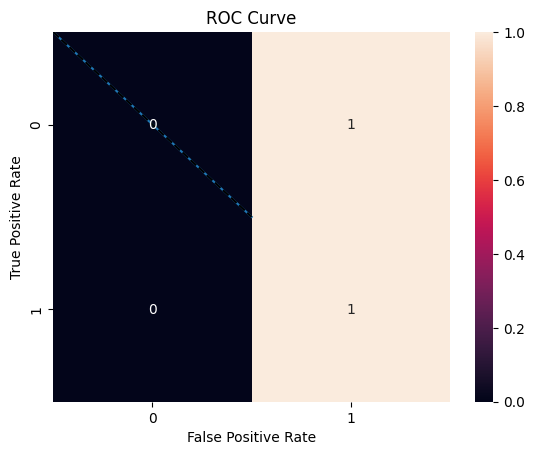

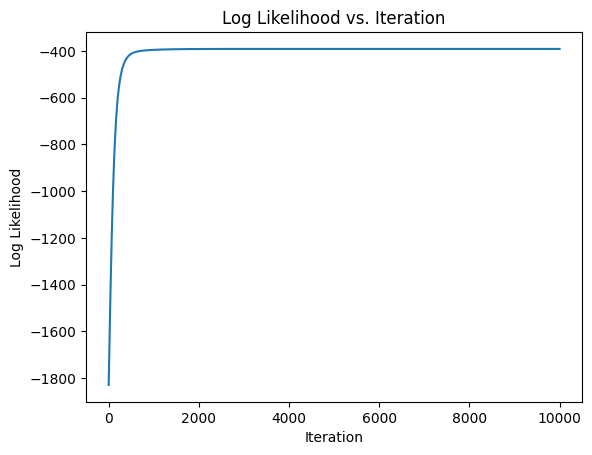

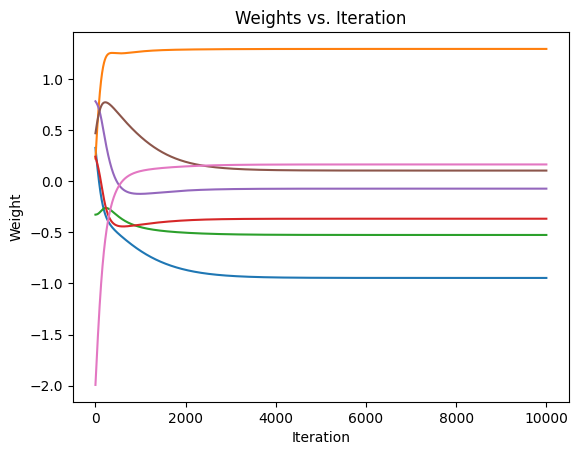

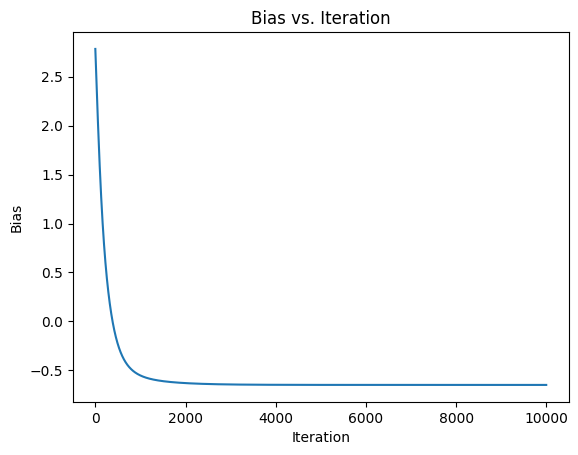

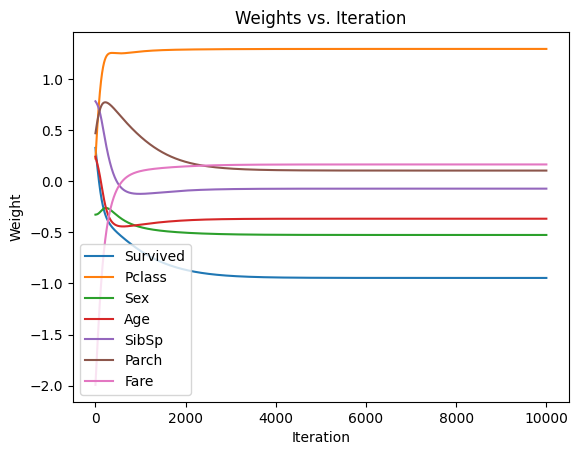

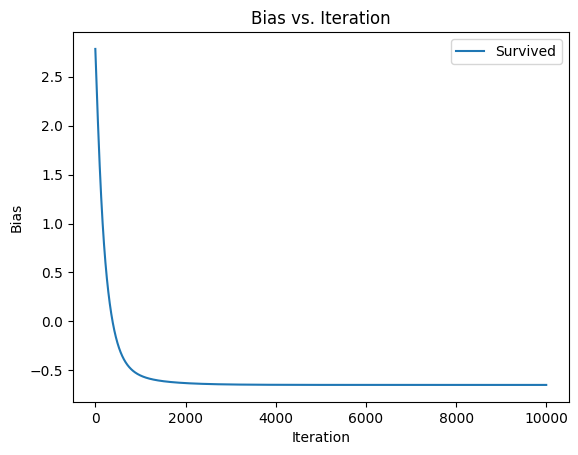

In [34]:
# define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# define z function as z = XW + b
def z(X, W, b):
    return np.dot(X, W) + b

# define the likelihood function
def likelihood(y, y_hat):
    return np.prod(y_hat**y * (1 - y_hat)**(1 - y))

# define the log likelihood function
def log_likelihood(y, y_hat):
    return np.sum(y*np.log(y_hat) + (1 - y)*np.log(1 - y_hat))

# define derivative of log likelihood with respect to W and b
def dL_dW(X, y, y_hat):
    return np.dot(X.T, y_hat - y)

def dL_db(y, y_hat):
    return np.sum(y_hat - y)

    # define the gradient descent function
    # add 1/m to the gradient descent function
    # save the log likelihood at each iteration
    # save the weights and bias at each iteration
def gradient_descent(X, y, W, b, learning_rate, num_iterations):
    log_likelihoods = []
    weights = []
    bias = []
    for i in range(num_iterations):
        y_hat = sigmoid(z(X, W, b))
        log_likelihoods.append(log_likelihood(y, y_hat))
        weights.append(W)
        bias.append(b)
        W = W - learning_rate*dL_dW(X, y, y_hat)*1/len(y)
        b = b - learning_rate*dL_db(y, y_hat)*1/len(y)
    return W, b, log_likelihoods, weights, bias


# initialize the weights and bias
W = np.random.randn(X_train.shape[1])
b = np.random.randn(1)

# run gradient descent
W, b, log_likelihoods, weights, bias = gradient_descent(X_train, y_train, W, b, 0.03, 10000)


# make predictions
y_hat = sigmoid(z(X_test, W, b))
y_hat = np.round(y_hat)

# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

# plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_hat)
sns.heatmap(cm, annot=True, fmt='g')

# plot the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# plot the log likelihood
plt.plot(log_likelihoods)
plt.xlabel('Iteration')
plt.ylabel('Log Likelihood')
plt.title('Log Likelihood vs. Iteration')
plt.show()

# plot the weights
plt.plot(weights)
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weights vs. Iteration')
plt.show()

# plot the bias
plt.plot(bias)
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.title('Bias vs. Iteration')
plt.show()


# plot the weights vs feature
plt.plot(weights)
plt.xlabel('Iteration')
plt.ylabel('Weight')
plt.title('Weights vs. Iteration')
plt.legend(df_feat.columns)
plt.show()

# plot the bias vs feature
plt.plot(bias)
plt.xlabel('Iteration')
plt.ylabel('Bias')
plt.title('Bias vs. Iteration')
plt.legend(df_feat.columns)
plt.show()




In [35]:
# predict new test data
data_test = pd.read_csv('test.csv')
params = clean_data(data_test)
data_test = params['dataset']
passenger_id = params['passenger_id']
scaled_features = scaler.transform(data_test)
df_feat = pd.DataFrame(scaled_features, columns=data_test.columns)
df_feat.head()

# make predictions
y_hat = sigmoid(z(scaled_features, W, b))
y_hat = np.round(y_hat)

# create a dataframe with the predictions
predictions = pd.DataFrame({'PassengerId': passenger_id, 'Survived': y_hat})
predictions.head()

# make sure the predictions are in the correct format
predictions['Survived'] = predictions['Survived'].astype(int)
predictions.head()

# make a submission
predictions.to_csv('submission.csv', index=False)

# print the survival rate
print('Survival Rate: ', predictions['Survived'].sum()/len(predictions))


Survival Rate:  0.3708133971291866
